(3, 192, 192, 3)
0 255
(3, 6, 192, 192)
0.0 1.0


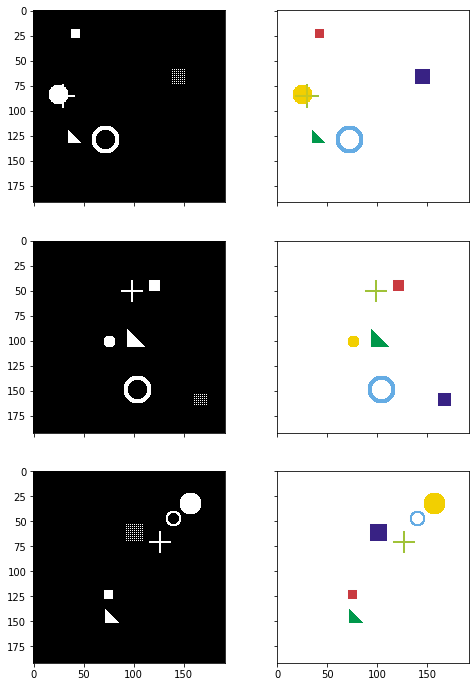

In [1]:
import utils.simulation as simulation
import numpy as np
import utils.helper as helper
import matplotlib.pyplot as plt

# Generate some random images
input_images, target_masks = simulation.generate_random_data(192, 192, count=3)

for x in [input_images, target_masks]:
    print(x.shape)
    print(x.min(), x.max())

# change channel-order and make 3 channels for matplot
input_images_rgb = [x.astype(np.uint8) for x in input_images]

# map each channels (i.e. class) to each color
target_masks_rgb = [helper.masks_to_colorimg(x) for x in target_masks]

# left: input iamge, rigth: target mask (ground-truth)
helper.plot_side_by_side([input_images_rgb, target_masks_rgb])


In [2]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class SimDataset(Dataset):
    def __init__(self, count, transform=None):
        super().__init__()

        self.input_images, self.target_masks = simulation.generate_random_data(
            192, 192, count=count)
        self.transform = transform

    def __len__(self):
        return len(self.input_images)

    def __getitem__(self, index):
        image = self.input_images[index]
        mask = self.target_masks[index]

        if self.transform:
            image = self.transform(image)

        return [image, mask]

# use same transform for train/val for this example 
trans = transforms.Compose([
    transforms.ToTensor(),
])

train_set = SimDataset(2000, transform=trans)
val_set = SimDataset(200, transform=trans)

image_datasets = {
    'train': train_set, 'val': val_set
}

batch_size = 25

dataloaders = {
    'train': DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0),
    'val': DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=0)
}

dataset_sizes = {
    x: len(image_datasets[x]) for x in image_datasets.keys()
}

dataset_sizes

/opt/conda/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: /opt/conda/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZNK3c106IValue23reportToTensorTypeErrorEv
  warn(f"Failed to load image Python extension: {e}")


{'train': 2000, 'val': 200}

torch.Size([25, 3, 192, 192]) torch.Size([25, 6, 192, 192])
0.0 1.0 0.022918837 0.1496448
0.0 1.0 0.0045972583 0.06764717


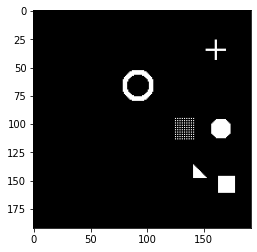

In [3]:
def reverse_transform(inp):
    inp = inp.numpy().transpose((1,2,0))
    inp = np.clip(inp, 0, 1)
    inp = (inp * 255).astype(np.uint8)

    return inp

# get a batch of training data 
inputs, masks = next(iter(dataloaders['train']))

print(inputs.shape, masks.shape)
for x in [inputs.numpy(), masks.numpy()]:
    print(x.min(), x.max(), x.mean(), x.std())

plt.imshow(reverse_transform(inputs[0]))

In [4]:
from torchinfo import summary
import torch 
from models.U_Net import UNet

unet = UNet(6).cuda()

summary(unet, input_size=(3, 224, 224))

AssertionError: Torch not compiled with CUDA enabled

In [ ]:
torch.cuda.is_available()

False